### Importação de bibliotecas e carregamento do dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset netflix
df = pd.read_csv("netflix.csv")

# Informações que podem de alguma forma ser importantes na análise, 
# desde que não afetem o resultado final podem ser substituidas por um valor padrão.
# Neste caso: Diretor, Elenco, País, Data em que foi adicionado a plataforma, Avaliação e Duração

df['director'].fillna('Desconhecido', inplace=True)
df['country'].fillna('Desconhecido', inplace=True)
df['rating'].fillna('Não classificado', inplace=True)
df['duration'].fillna('Desconhecido', inplace=True)

# Em 'data_added' será adicionado NaT (Not a Time)  
# (Ideal para quando a ausência de uma data é uma informação válida e não deve ser substituída por uma data fictícia)
df['date_added'].fillna(pd.NaT, inplace=True)

# Traduzir nome das colunas para facilitar a leitura

df.rename(columns={
    'show_id': 'id_show',
    'type': 'tipo',
    'title': 'titulo',
    'director': 'diretor',
    'cast': 'elenco',
    'country': 'pais',
    'date_added': 'data_adicionada',
    'release_year': 'ano_lancamento',
    'rating': 'avaliacao',
    'duration': 'duracao',
    'listed_in': 'genero',
    'description': 'descricao'
}, inplace=True)



# Criar nova coluna `duracao_minutos` para armazenar a duração em minutos para filmes
df['duracao_minutos'] = np.where(df['duracao'].str.contains('min'), 
                                 df['duracao'].str.extract('(\d+)')[0].astype(float), 
                                 np.nan)

# Criar nova coluna `temporadas` para armazenar o número de temporadas para séries (Season ou Seasons)
df['temporadas'] = np.where(df['duracao'].str.contains(r'Season[s]?'), 
                            df['duracao'].str.extract('(\d+)')[0].astype(float), 
                            np.nan)

### Técnicas de Transformação e Normalização de Dados

#### Transformação Logarítmica

##### Descrição
A transformação logarítmica é frequentemente aplicada a dados com uma grande amplitude de valores ou uma distribuição assimétrica. 
Ela ajuda a suavizar a distribuição, facilitando a análise e a visualização. Essa técnica é especialmente útil para dados positivos e contínuos.

Por exemplo, em um dataset de preços de imóveis, essa transformação ajuda a reduzir a influência dos valores mais altos, tornando a 
distribuição mais simétrica.

No dataset da Netflix, a coluna `duração_minutos` possui uma grande variação de valores e pode se beneficiar da transformação logarítmica 
para reduzir o impacto dos outliers e melhorar a análise dos dados.


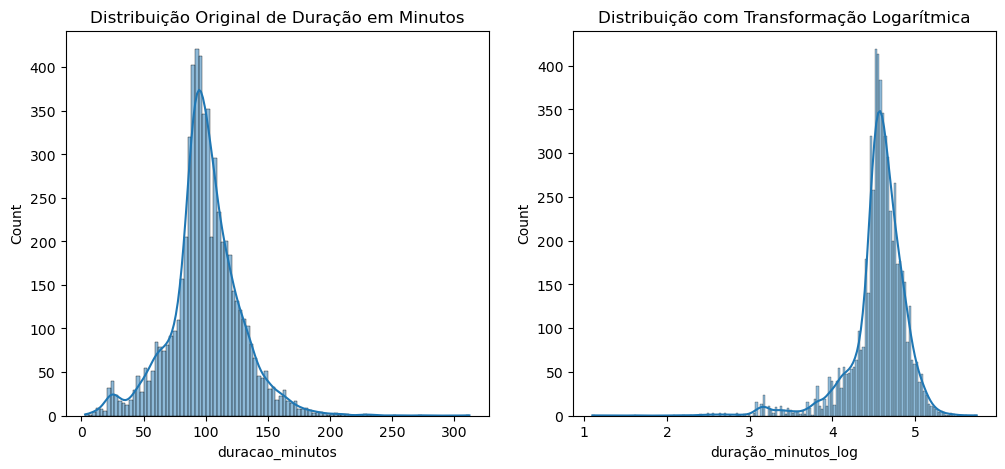

   duracao_minutos  duração_minutos_log
0             90.0             4.499810
1              NaN                  NaN
2              NaN                  NaN
3             91.0             4.510860
4            125.0             4.828314


In [5]:
# Aplicar a transformação logarítmica na coluna 'duração_minutos'
df['duração_minutos_log'] = np.log(df['duracao_minutos'].replace(0, np.nan))  # Evita log de 0

# Comparar antes e depois
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['duracao_minutos'].dropna(), kde=True)
plt.title('Distribuição Original de Duração em Minutos')

plt.subplot(1, 2, 2)
sns.histplot(df['duração_minutos_log'].dropna(), kde=True)
plt.title('Distribuição com Transformação Logarítmica')

plt.show()

print(df[['duracao_minutos', 'duração_minutos_log']].head())

In [6]:
# Importação para CSV

df.to_csv('netflix-cleaned.csv', index=False)